# Theoretical Foundations of Digital Signal Processing

1.1 Core Mathematical Concepts

A. Signal Classification

Signals are mathematical functions that convey information about physical phenomena. They can be classified along several dimensions:

1. Continuous vs Discrete
$$x(t) = A \sin{(2 \pi ft + \phi)}$$
$$x[n] = A \sin{( 2 \pi f \frac{n}{F_s} + \phi)}$$

2. Deterministic vs Random
* Deterministic: Can be dscribed by explicit mathematical formula
* Random: Statistical propertis obly (noise, stochastic processes)

3. Periodic vs Aperiodic
* Periodic: $x(t+T)=x(t)$ for some $T>0$
* No such $T$ exists

# B. Complex Numbers - The foundation of DSP

Complex numbers are essential for understanding frequency domain analysis:


In [1]:
import cmath
import numpy as np

# Complex number representation
z = 3 + 4j # Rectangular form
# Or
z = complex(3, 4)

# Euler's formula:
theta = np.pi/4
euler = np.exp(1j * theta)
real_part = np.cos(theta)
imag_part = np.sin(theta)
z = complex(np.cos(theta), np.sin(theta))

# Polar form
magnitude = abs(z)
phase = np.angle(z)

# Complex conjugate
z_conj = z.conjugate()


## Why complex numbers matter in DSP:
* Simplify trigonometric calculations
* Provide compact representation of amplitude and phase
* Enable frecuency domain analysis via Fourier transforms

# 1.2. Signals and Systems Fundamentals

## A. System properties
A system transforms an input signal into an output signal: $y(t) = T\{x(t)\}$

### 1. Linearity:


In [2]:
# Test for linearity

def is_linear(system_func, x1, x2, a, b):
  # Check superposition principle
  left = system_func(a*x1 + b*x2)
  right = a * system_func(x1) + b * system_func(x2)
  return np.allclose(left, right)

### 2. Time Invariance:

In [3]:
def is_time_invariant(system_func, x, delay):
  # Output for delayed input
  y_delayed_input = system_func(np.roll(x, delay))
  # Delayed output
  y_delayed_output = np.roll(system_func(x), delay)
  return np.allclose(y_delayed_input, y_delayed_output)

### 3. Causality: Output depends only on present and past inputs
### 4. Stability: Bounded input produces bounded output (BIBO)

# B. Convolution - The heart of Linear Systems

Convolution describes how linear time-invariant (LTI) system process signals:

#### Continuous convolution:
$$y(t) = x(t) * h(t) = \int x(\tau) h(t-\tau) d\tau$$

#### Discrete convolution

$$y[n] = x[n] * h[n] = \sum x[k] h[n-k]$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def manual_convolution(x, h):
  """Manual implmenetation of discrete convolution"""
  N = len(x)
  M = len(h)
  y_len = N + M + 1
  y = np.zeros(y_len)

  for n in range(y_len):
    for k in range(N):
      if 0 <= n-k < M:
        y[n] += x[k] * h[n-k]
  return y


/tmp/ipython-input-2990362927.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax3.legend()


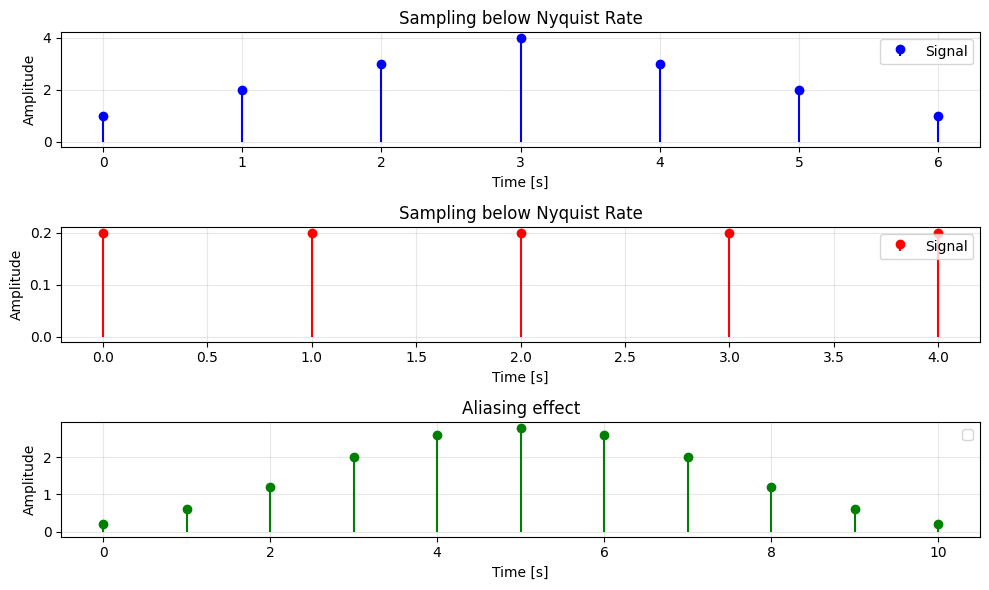

In [26]:
# Example: Moving average filter
x = np.array([1, 2, 3, 4, 3, 2, 1,])  # Input signal
h = np.array([0.2, 0.2, 0.2, 0.2, 0.2])  # Moving average filter
y = manual_convolution(x, h)

# Using NumPy's built-in function
y_numpy = np.convolve(x, h, mode='full')

t = np.arange(0, len(y_numpy))

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6))
ax1.stem(x, 'r', markerfmt='bo', linefmt='b-', basefmt=' ', label='Signal')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude')
ax1.legend()
ax1.set_title('Sampling below Nyquist Rate')
ax1.grid(True, alpha=0.3)

ax2.stem(h, 'r', markerfmt='ro', linefmt='r-', basefmt=' ', label='Signal')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Amplitude')
ax2.legend()
ax2.set_title('Sampling below Nyquist Rate')
ax2.grid(True, alpha=0.3)

ax3.stem(y_numpy, 'r', markerfmt='go', linefmt='g-', basefmt=' ')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Amplitude')
ax3.legend()
ax3.set_title('Aliasing effect')
ax3.grid(True, alpha=0.3)



plt.tight_layout()
plt.show()

# 1.3 The Sampling Theorem (Nyquist-Shannon)

## A. Theory and Mathematics

The sampling theorem states that a continuous signal can be perfectly reconstructed from its samples if:
1. The signal is **bandlimited** (contains no frequencies above $f_{max}$)
2. The sampling frequency satisfies: $f_s > 2f_{max}$

The critical frequency $f_{Nyquist} = f_s/2$ is called the **Nyquist frequency**

## B. Aliasing Demonstration

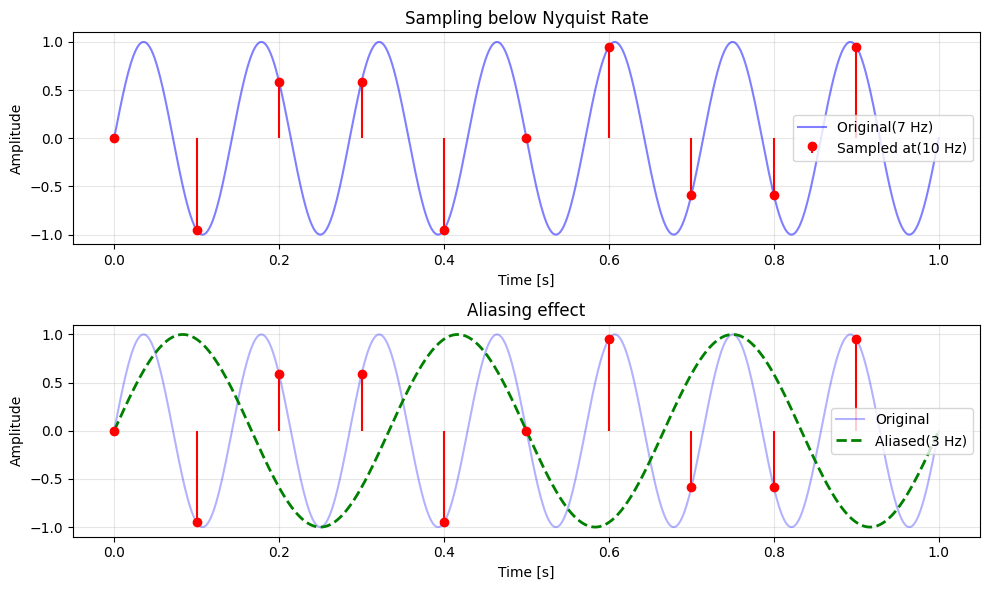

Original frequency: 7 Hz
Sampling frequency: 10 Hz
Nyquist frequency: 5.0 Hz
Aliased frequency: 3 Hz
Condition f_s > 2*f_max: 10 > 14 = False


In [13]:
import numpy as np
import matplotlib.pyplot as plt

def demonstrate_aliasing():
  # Create a high-frequency signal
  f_signal = 7 # Hz
  f_sample = 10 # hz (INSUFFICIENT - causes aliasing!)
  t_continuous = np.linspace(0, 1, 1000)
  t_discrete = np.arange(0, 1, 1/f_sample)

  # Continuous signal
  x_continuous = np.sin(2 * np.pi * f_signal * t_continuous)

  # Sampled signal
  x_sampled = np.sin(2 * np.pi * f_signal * t_discrete)

  # What we perceive (aliased frequency)
  f_alias = f_signal - f_sample #
  x_alias = np.sin(2 * np.pi * abs(f_alias) * t_continuous)

  # Plot results
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

  ax1.plot(t_continuous, x_continuous, 'b-', alpha=0.5, label=f'Original({f_signal} Hz)')
  ax1.stem(t_discrete, x_sampled, 'r', markerfmt='ro', linefmt='r-', basefmt=' ', label=f'Sampled at({f_sample} Hz)')
  ax1.set_xlabel('Time [s]')
  ax1.set_ylabel('Amplitude')
  ax1.legend()
  ax1.set_title('Sampling below Nyquist Rate')
  ax1.grid(True, alpha=0.3)

  ax2.plot(t_continuous, x_continuous, 'b-', alpha=0.3, label='Original')
  ax2.plot(t_continuous, x_alias, 'g--', linewidth=2, label=f'Aliased({abs(f_alias)} Hz)')
  ax2.stem(t_discrete, x_sampled, 'r', markerfmt='ro', linefmt='r-', basefmt=' ')
  ax2.set_xlabel('Time [s]')
  ax2.set_ylabel('Amplitude')
  ax2.legend()
  ax2.set_title('Aliasing effect')
  ax2.grid(True, alpha=0.3)


  plt.tight_layout()
  plt.show()

  print(f"Original frequency: {f_signal} Hz")
  print(f"Sampling frequency: {f_sample} Hz")
  print(f"Nyquist frequency: {f_sample/2} Hz")
  print(f"Aliased frequency: {abs(f_alias)} Hz")
  print(f"Condition f_s > 2*f_max: {f_sample} > {2*f_signal} = {f_sample > 2*f_signal}")

demonstrate_aliasing()

## C.Anti-Aliasing Filters

In [28]:
def design_anti_aliasing_filter(cuttof_freq, fs, filter_order=4):
  """
  Design Butterworth anti-aliasing filter
  cuttof_freq: Should be <= fs/2 (Nyquist frequency)
  """

  from scipy.signal import butter, freqz

  nyquist = fs / 2
  normalized_cutoff = cuttof_freq / nyquist

  if normalized_cutoff >= 1:
    raise ValueError("Cutoff frequency must be below Nyquist frequency")

  # Design lowpass Butterworth filter
  b, a = butter(filter_order, normalized_cutoff, btype='low', analog=False)

  return b, abs

def apply_anti_aliasing(signal, fs, cutoff_freq):
  """ Apply anti-aliasing filter and resample"""
  from scipy.signal import filtfilt, resample

  # Design filter
  b, a = design_anti_aliasing_filter(cutoff_freq, fs)

  # Apply filter (zero-phase filtering)
  filtered = filtfilt(b, a, signal)

  return filtered

# 1.4. Transform Domains

A. Fourier Transform Family
| Transform | Domain | Usage |
|--------------|--------------|--------------|
|Fourier Transform (FT)	|Continuous time ↔ Frequency	| Theoretical analysis|
|Discrete-Time FT (DTFT)|	Discrete time ↔ Continuous frequency	| Theoretical|
|Discrete FT (DFT)|	Discrete time ↔ Discrete frequency| Practical computation|
|Fast FT (FFT)	  |Efficient algorithm for DFT	|Real-world applications|


# B. Discrete Fourier Transform (DFT)

The DFT Transforms $N$ samples from time domain to frequency domain:

$$X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j2 \pi k \frac{n}{N}} , k = 0, ... , N-1$$

In [ ]:
import numpy as np

DSP Guide
https://www.dspguide.com/ch2/1.htm


Any discrete signal could be to combine thought:

#### Sum:
$$y[n]=x_1[n]+x_2[n]$$

For example, signal and noise

#### Scaling:
$$y[n]=a \cdot x[n]$$

For example, amplification and attenuation.

#### Delay:
$$y[n]=x[n - D]$$

This is key for FIR filters

### Convolution:

In a DSP system, filter = convolving the input signal with the filter's impulse response.

$$y[n] = (x * h)[n] = \sum _{k=0} ^{M-1} { h[k]x[n-k]}$$

* $x[n]$: input signal.
* $h[k]$: filter coefficients.
* $y[n]$: output filtered.

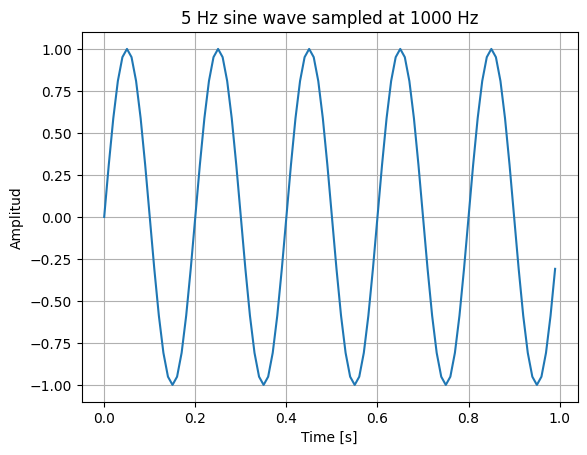

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# params

fs = 100   # sampling frecuency
T = 1.0     # time
f0 = 5      # angular frecuency

t = np.arange(0, T, 1/fs)   # time vector
x = np.sin(2 * np.pi * f0 * t)

plt.figure()
plt.plot(t, x)
plt.xlabel("Time [s]")
plt.ylabel("Amplitud")
plt.title("5 Hz sine wave sampled at 1000 Hz")
plt.grid(True)
plt.show()

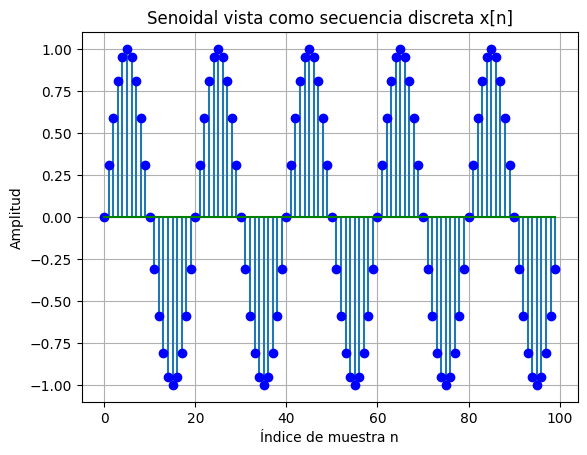

In [ ]:
n = np.arange(len(x))

plt.figure()
plt.stem(n, x, markerfmt='bo', basefmt='g-')
plt.xlabel("Índice de muestra n")
plt.ylabel("Amplitud")
plt.title("Senoidal vista como secuencia discreta x[n]")
plt.grid(True)
plt.show()

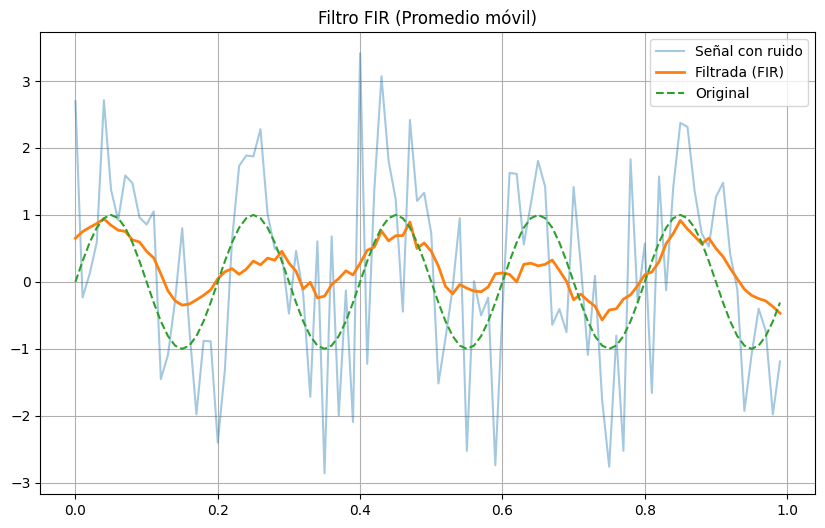

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 100
T = 1.0
t = np.arange(0, T, 1/fs)

x = np.sin(2 * np.pi * 5 * t)

noise = 1 * np.random.randn(len(t))

x_noisy = x + noise

N = 15
h = np.ones(N) / N
y = np.convolve(x_noisy, h, mode='same')

plt.figure(figsize=(10,6))
plt.plot(t, x_noisy, label="Señal con ruido", alpha=0.4)
plt.plot(t, y, label="Filtrada (FIR)", linewidth=2)
plt.plot(t, x, label="Original", linestyle='--')
plt.legend()
plt.grid(True)
plt.title("Filtro FIR (Promedio móvil)")
plt.show()

# Transformada Discreta de Fourier (DFT)

La señal discreta $x[n]$ tiene un espectro discreto $X[n]$:

$$X[k]= \sum _{n=0} ^{N-1} x[n]e^{-j2 \pi k n/N}$$

* $N$: número de muestras
* $k$: índice de frecuencia
* Magnitud: $|X[k]|$ -> "cuánta energía hay en esa frecuencia"
* Fase: $arg(X[k])$

Pero la DFT es muy lenta: $O(N^2)$

Por eso usamos FFT: $O(N log N)$

# Transformada Rápida de Fourier FFT

Es un algoritmo optimizado para realizar la DFT rápidamente.

La frecuencia correspondiente a bin $k$:
$$f_k = \frac{k}{N} fs$$

Resolución en frecuencia:

$$\Delta f = \frac{f_s}{N}$$



# Spectral Analisys

